In [20]:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars
import joblib  # Writing and loading

import sys
sys.path.insert(0, '../')
import vqe
import qcnn
import nnising_chain
import annni_model
import losses
import hamiltonians
import visualization as qplt
##############

In [10]:
N = 8
n_states = 100
J1 = 1

lr = 0.001
epochs = 10000
reg = 0

In [11]:
Hs = hamiltonians.hamiltonian(nnising_chain.build_Hs, N = N, n_states = n_states, J1 = J1)
myvqe = vqe.vqe(Hs, vqe.circuit_ising)

In [12]:
myvqe.train(lr, 10, circuit = True, recycle = True, reg = 0)
myvqe.train(lr, epochs, circuit = False, recycle = False, reg = reg, save_trajectories = True)

+--- CIRCUIT ---+
0: ──RY(0.00)──||─╭IsingXX(8.00)───────────────────────────────────────────────────────────────
1: ──RY(1.00)──||─╰IsingXX(8.00)─╭IsingXX(9.00)────────────────────────────────────────────────
2: ──RY(2.00)──||────────────────╰IsingXX(9.00)─╭IsingXX(10.00)────────────────────────────────
3: ──RY(3.00)──||───────────────────────────────╰IsingXX(10.00)─╭IsingXX(11.00)────────────────
4: ──RY(4.00)──||───────────────────────────────────────────────╰IsingXX(11.00)─╭IsingXX(12.00)
5: ──RY(5.00)──||───────────────────────────────────────────────────────────────╰IsingXX(12.00)
6: ──RY(6.00)──||──────────────────────────────────────────────────────────────────────────────
7: ──RY(7.00)──||──────────────────────────────────────────────────────────────────────────────

───────────────────────────────────||──RY(15.00)──||─╭IsingXX(23.00)────────────────────────────────
───────────────────────────────────||──RY(16.00)──||─╰IsingXX(23.00)─╭IsingXX(24.00)────────────────
───────────

100/100: 100%|██████████████████████████████████| 99/99 [00:08<00:00, 12.23it/s]
Cost: 0.0000 | Mean F.: 0.4998: 100%|████| 10000/10000 [00:27<00:00, 361.60it/s]


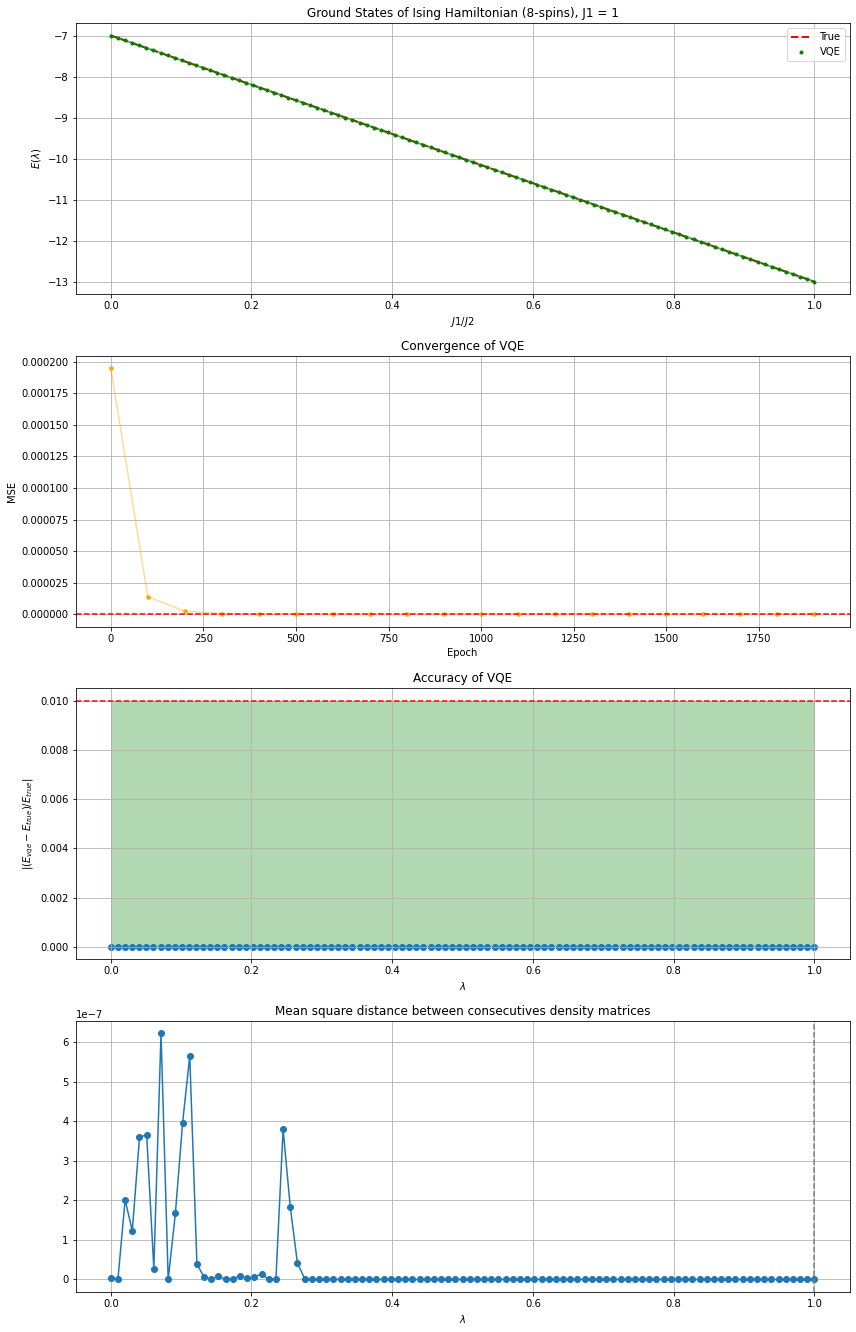

In [13]:
qplt.show_VQE_nnisingchain(myvqe)

In [21]:
myqcnn = qcnn.qcnn(myvqe, qcnn.qcnn_circuit)
myqcnn.train(0.25, 2000, np.arange(100), losses.cross_entropy, circuit=False, plot=False)

Cost: 0.6931160092353821: 100%|████████████| 2000/2000 [00:15<00:00, 128.76it/s]


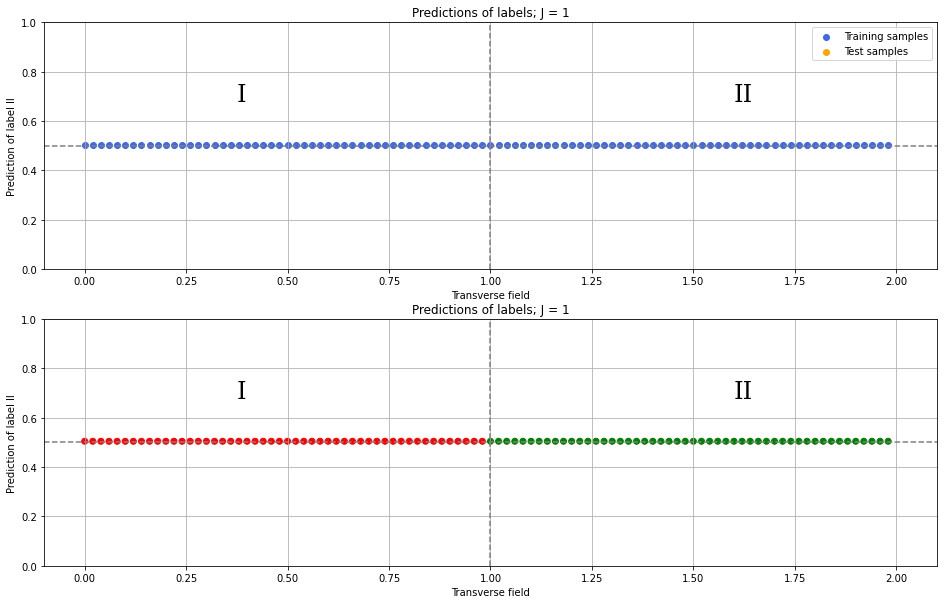

In [23]:
myqcnn.show_results_isingchain()